In [1]:
import re
import numpy as np
import pandas as pd
import tqdm.auto as tqdm
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
def preprocess(text):
  text = text.lower()
  text = [word for word in text.split() if not word in all_stopwords and len(word)>1]
  text = re.sub('[^a-z ]', ' ', ' '.join(text))
  text = ' '.join(text.split())
  return text

In [3]:
train = pd.read_csv('train.csv')
train.drop('ID', axis=1, inplace=True)
train.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [4]:
all_stopwords = stopwords.words('english')

In [5]:
train['MERGED'] = train.TITLE + ' ' + train.ABSTRACT

In [6]:
train['MERGED'] = train.MERGED.apply(preprocess)

In [7]:
train.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,MERGED
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,reconstructing subject specific effect maps pr...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,rotation invariance neural network rotation in...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,spherical polyharmonics poisson kernels polyha...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,finite element approximation stochastic maxwel...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,comparative study discrete wavelet transforms ...


In [8]:
train['MERGED'] = train.MERGED.apply(text_to_word_sequence)

NameError: ignored

(array([4.470e+02, 2.021e+03, 3.631e+03, 5.045e+03, 4.475e+03, 3.047e+03,
        1.657e+03, 6.340e+02, 1.300e+01, 2.000e+00]),
 array([  31. ,  233.6,  436.2,  638.8,  841.4, 1044. , 1246.6, 1449.2,
        1651.8, 1854.4, 2057. ]),
 <a list of 10 Patch objects>)

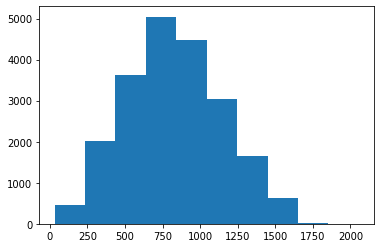

In [9]:
plt.hist([len(title) for title in train.MERGED])

In [10]:
len(train.loc[[len(title)<225 for title in train.MERGED]])

402

In [11]:
train = train.loc[[len(title)<225 for title in train.MERGED]]

In [12]:
len({word for word_list in train.MERGED for word in word_list})

27

In [13]:
max_len_merged = max([len(abstract) for abstract in train.MERGED])
vocab_len = len({word for word_list in train.MERGED for word in word_list})

In [14]:
print(max_len_merged)
print(vocab_len)

224
27


In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.MERGED)
train['MERGED'] = tokenizer.texts_to_sequences(train.MERGED)

In [16]:
train.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,MERGED
61,Timed Automata with Polynomial Delay and their...,"We consider previous models of Timed, Probab...",1,0,0,0,0,0,"[450, 146, 53, 833, 834, 232, 451, 188, 450, 5..."
66,Regularity of envelopes in Kähler classes,"We establish the C^{1,1} regularity of quasi...",0,0,1,0,0,0,"[147, 836, 4, 575, 354, 234, 40, 147, 235, 151..."
169,Marcel Riesz on Nörlund Means,We note that the necessary and sufficient co...,0,0,1,0,0,0,"[837, 838, 2, 839, 1516, 13, 355, 148, 76, 577..."
235,An automata group of intermediate growth and e...,We give a new example of an automata group o...,0,0,1,0,0,0,"[146, 8, 844, 357, 150, 845, 7, 17, 279, 146, ..."
387,Belyi map for the sporadic group J1,We compute the genus 0 Belyi map for the spo...,0,0,1,0,0,0,"[847, 103, 848, 8, 280, 281, 236, 847, 103, 84..."


In [17]:
train.shape

(402, 9)

In [19]:
X = pad_sequences(train.MERGED, maxlen=max_len_merged)

In [20]:
X.shape

(402, 224)

In [21]:
train.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,MERGED,PADDED
61,Timed Automata with Polynomial Delay and their...,"We consider previous models of Timed, Probab...",1,0,0,0,0,0,"[450, 146, 53, 833, 834, 232, 451, 188, 450, 5...",0
66,Regularity of envelopes in Kähler classes,"We establish the C^{1,1} regularity of quasi...",0,0,1,0,0,0,"[147, 836, 4, 575, 354, 234, 40, 147, 235, 151...",0
169,Marcel Riesz on Nörlund Means,We note that the necessary and sufficient co...,0,0,1,0,0,0,"[837, 838, 2, 839, 1516, 13, 355, 148, 76, 577...",0
235,An automata group of intermediate growth and e...,We give a new example of an automata group o...,0,0,1,0,0,0,"[146, 8, 844, 357, 150, 845, 7, 17, 279, 146, ...",0
387,Belyi map for the sporadic group J1,We compute the genus 0 Belyi map for the spo...,0,0,1,0,0,0,"[847, 103, 848, 8, 280, 281, 236, 847, 103, 84...",0


In [24]:
y = train.iloc[:, 2:-2]